# Project

# Used cars in Different Cities

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import requests
from bs4 import BeautifulSoup

# Data Collection

In [5]:
for i in range(1,100):
    url='https://www.cartrade.com/buy-used-cars/#so=-1&sc=-1&city='+str(i)
    print(url)

https://www.cartrade.com/buy-used-cars/#so=-1&sc=-1&city=1
https://www.cartrade.com/buy-used-cars/#so=-1&sc=-1&city=2
https://www.cartrade.com/buy-used-cars/#so=-1&sc=-1&city=3
https://www.cartrade.com/buy-used-cars/#so=-1&sc=-1&city=4
https://www.cartrade.com/buy-used-cars/#so=-1&sc=-1&city=5
https://www.cartrade.com/buy-used-cars/#so=-1&sc=-1&city=6
https://www.cartrade.com/buy-used-cars/#so=-1&sc=-1&city=7
https://www.cartrade.com/buy-used-cars/#so=-1&sc=-1&city=8
https://www.cartrade.com/buy-used-cars/#so=-1&sc=-1&city=9
https://www.cartrade.com/buy-used-cars/#so=-1&sc=-1&city=10
https://www.cartrade.com/buy-used-cars/#so=-1&sc=-1&city=11
https://www.cartrade.com/buy-used-cars/#so=-1&sc=-1&city=12
https://www.cartrade.com/buy-used-cars/#so=-1&sc=-1&city=13
https://www.cartrade.com/buy-used-cars/#so=-1&sc=-1&city=14
https://www.cartrade.com/buy-used-cars/#so=-1&sc=-1&city=15
https://www.cartrade.com/buy-used-cars/#so=-1&sc=-1&city=16
https://www.cartrade.com/buy-used-cars/#so=-1&sc=

In [6]:
page=requests.get(url)

In [7]:
page.status_code

200

In [8]:
page.content

b'\n<!doctype html><html xmlns="http://www.w3.org/1999/xhtml" itemscope itemtype="http://schema.org/WebPage" lang="en"><head prefix="og: https://ogp.me/ns# fb: https://ogp.me/ns/fb#"><script>(function (w, d, s, l, i) {\n\t\t\tw[l] = w[l] || []; w[l].push({\n\t\t\t\t\'gtm.start\':\n\t\t\t\t\tnew Date().getTime(), event: \'gtm.js\'\n\t\t\t}); var f = d.getElementsByTagName(s)[0],\n\t\t\t\tj = d.createElement(s), dl = l != \'dataLayer\' ? \'&l=\' + l : \'\'; j.async = true; j.src =\n\t\t\t\t\t\'//www.googletagmanager.com/gtm.js?id=\' + i + dl; f.parentNode.insertBefore(j, f);\n\t\t})(window, document, \'script\', \'dataLayer\', \'GTM-PX2SL8\');</script><meta http-equiv="Content-Type" content="text/html; charset=UTF-8" /><meta http-equiv="X-UA-Compatible" content="IE=EmulateIE8" /><meta name="p:domain_verify" content="b18199effd18966f8371d5c6a89d679a" /><meta name="verify-v1" content="t7AA94tCxcqsw3dg0cPP8L7cw4eP8I1z2fMJOF8x/es=" /><meta name="msvalidate.01" content="EFA688F23F4C9EACA6C834

In [9]:
soup=BeautifulSoup(page.content)

In [10]:
soup


<!DOCTYPE html>
<html itemscope="" itemtype="http://schema.org/WebPage" lang="en" xmlns="http://www.w3.org/1999/xhtml"><head prefix="og: https://ogp.me/ns# fb: https://ogp.me/ns/fb#"><script>(function (w, d, s, l, i) {
			w[l] = w[l] || []; w[l].push({
				'gtm.start':
					new Date().getTime(), event: 'gtm.js'
			}); var f = d.getElementsByTagName(s)[0],
				j = d.createElement(s), dl = l != 'dataLayer' ? '&l=' + l : ''; j.async = true; j.src =
					'//www.googletagmanager.com/gtm.js?id=' + i + dl; f.parentNode.insertBefore(j, f);
		})(window, document, 'script', 'dataLayer', 'GTM-PX2SL8');</script><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><meta content="IE=EmulateIE8" http-equiv="X-UA-Compatible"/><meta content="b18199effd18966f8371d5c6a89d679a" name="p:domain_verify"/><meta content="t7AA94tCxcqsw3dg0cPP8L7cw4eP8I1z2fMJOF8x/es=" name="verify-v1"/><meta content="EFA688F23F4C9EACA6C8346AF349155D" name="msvalidate.01"/><meta content="6a550d19bd46f2486bb008c492

# Collection

In [11]:
Details=soup.find_all("div",attrs={"class":"details_out"})
Details[0].text.split()

['2021',
 'Maruti',
 'Suzuki',
 'Wagon',
 'R',
 'LXi',
 '1.0',
 'CNG',
 '₹5,50,000',
 'Make',
 'Offer',
 'EMI',
 'starts',
 'at',
 '₹9,133',
 '58,254',
 'KMs|CNG|Vadodara',
 'CONTACT',
 'SELLER']

In [12]:
price = []
company = []
model = []
variant = []
km = []
engine_type = []
location = []
year = []
for i in range(1,100):
    url1 = 'https://www.cartrade.com/buy-used-cars/#so=-1&sc=-1&city='+str(i)
    page = requests.get(url1)
    soup = BeautifulSoup(page.text)
    file = soup.find_all('div', class_="cr_prc")

    for i in file:
        a = i.text
        price.append(a.split()[0])

    file = soup.find_all('div', class_='details_out')

    for i in file:
        a = i.text.split()
        model.append(a[2])
        year.append(*a[0].split())
        company.append(a[1])
        variant.append(a[3])

    file = soup.find_all('div', class_='info_cr_new')

    for i in file:
        a = i.text
        km.append(a.split("|")[0])
        engine_type.append(a.split("|")[1])
        location.append(a.split("|")[2].split()[0])


# Data-Frame

In [13]:
Data= {"Company":company,"Model":model,"Price":price,"Variant":variant,"Km":km,"Engine_type":engine_type,"Year":year,"Location":location}

In [14]:
df=pd.DataFrame(Data)

In [15]:
df

,Company,Model,Price,Variant,Km,Engine_type,Year,Location
0,Mercedes-Benz,E-Class,"₹52,00,000",E,"20,000 KMs",Diesel,2019,Pune
1,Mahindra,XUV500,"₹8,95,000",W10,"52,000 KMs",Diesel,2015,Delhi
2,Hyundai,i20,"₹6,50,000",Active,"49,000 KMs",Petrol,2015,Bangalore
3,Maruti,Suzuki,"₹5,70,000",Swift,"58,006 KMs",Petrol,2018,Delhi
4,Kia,Seltos,"₹12,75,000",2022,"14,937 KMs",Petrol,2021,Mumbai
...,...,...,...,...,...,...,...,...
3156,Tata,Altroz,"₹8,19,000",XZ,"23,360 KMs",Petrol,2021,Bangalore
3157,Maruti,Suzuki,"₹6,79,000",Wagon,"22,324 KMs",Petrol,2020,Bangalore
3158,Maruti,Suzuki,"₹5,31,000",Wagon,"15,363 KMs",Petrol,2020,Kolkata
3159,Maruti,Suzuki,"₹9,79,000",Vitara,"22,500 KMs",Petrol,2020,Mysore


In [16]:
##df.to_csv("Tharun_Project_Page_100.csv")

# Data Cleaning

In [17]:
df['Year'] = df['Year'].astype('int32')

In [18]:
df['Price'] = [re.sub(r"[^\d+]","",i)for i in df['Price']]
df['Price'] = df['Price'].astype('int32')

In [19]:
df['Km'] = [re.sub(r"[^\d+]","",i) for i in df['Km']]
df['Km'] = df['Km'].astype('int32')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3161 entries, 0 to 3160
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Company      3161 non-null   object
 1   Model        3161 non-null   object
 2   Price        3161 non-null   int32 
 3   Variant      3161 non-null   object
 4   Km           3161 non-null   int32 
 5   Engine_type  3161 non-null   object
 6   Year         3161 non-null   int32 
 7   Location     3161 non-null   object
dtypes: int32(3), object(5)
memory usage: 160.6+ KB


# Data Visualization

In [21]:
df

,Company,Model,Price,Variant,Km,Engine_type,Year,Location
0,Mercedes-Benz,E-Class,5200000,E,20000,Diesel,2019,Pune
1,Mahindra,XUV500,895000,W10,52000,Diesel,2015,Delhi
2,Hyundai,i20,650000,Active,49000,Petrol,2015,Bangalore
3,Maruti,Suzuki,570000,Swift,58006,Petrol,2018,Delhi
4,Kia,Seltos,1275000,2022,14937,Petrol,2021,Mumbai
...,...,...,...,...,...,...,...,...
3156,Tata,Altroz,819000,XZ,23360,Petrol,2021,Bangalore
3157,Maruti,Suzuki,679000,Wagon,22324,Petrol,2020,Bangalore
3158,Maruti,Suzuki,531000,Wagon,15363,Petrol,2020,Kolkata
3159,Maruti,Suzuki,979000,Vitara,22500,Petrol,2020,Mysore


In [22]:
df.duplicated().sum()

2626

In [23]:
df.drop_duplicates(keep="first",inplace=True)

In [24]:
df

,Company,Model,Price,Variant,Km,Engine_type,Year,Location
0,Mercedes-Benz,E-Class,5200000,E,20000,Diesel,2019,Pune
1,Mahindra,XUV500,895000,W10,52000,Diesel,2015,Delhi
2,Hyundai,i20,650000,Active,49000,Petrol,2015,Bangalore
3,Maruti,Suzuki,570000,Swift,58006,Petrol,2018,Delhi
4,Kia,Seltos,1275000,2022,14937,Petrol,2021,Mumbai
...,...,...,...,...,...,...,...,...
3099,Volkswagen,Polo,285000,Comfortline,51609,Petrol,2010,Mumbai
3131,Kia,Sonet,1390000,GTX,45000,Diesel,2020,Madurai
3132,Tata,Safari,2075000,XZ,27000,Diesel,2021,Mumbai
3133,Honda,City,995000,ZX,34155,Petrol,2018,Mumbai


In [25]:
from matplotlib import pyplot as plt

Analysis of the used car market in india:
The number of used cars available for sale
the average price of used cars

# Groupby

Vehicle having price year wise

In [26]:
# Prices mean
#df.pivot_table(index = ['Year'], aggfunc ='size')
pr_yr = df.groupby(df['Year'])['Price'].sum().reset_index()
pr_yr

,Year,Price
0,2005,75000
1,2007,80000
2,2008,1175000
3,2009,620000
4,2010,4501000
5,2011,32046000
6,2012,12254999
7,2013,24896999
8,2014,36143999
9,2015,43412000


Company wise price

In [27]:
## price plot
(df.groupby(df["Company"])["Price"].mean().reset_index())

,Company,Price
0,Aston,8.500000e+06
1,Audi,4.465944e+06
2,BMW,4.208966e+06
3,Bentley,1.150000e+07
4,Chevrolet,2.687500e+05
5,Citroen,7.450000e+05
6,Datsun,1.750000e+05
7,Ford,9.162800e+05
8,Honda,6.957292e+05
9,Hyundai,7.016750e+05


##Company = price < 10 lac

##Company = price > 20 lac

In [28]:
low_pr = df[df['Price']<=1000000]
max_pr = df[df['Price']>2000000]

In [29]:
max_pr

,Company,Model,Price,Variant,Km,Engine_type,Year,Location
0,Mercedes-Benz,E-Class,5200000,E,20000,Diesel,2019,Pune
7,Jeep,Compass,2375000,Limited,12000,Petrol,2021,Mumbai
32,Porsche,Cayenne,15485777,Base,6022,Petrol,2021,Mumbai
33,BMW,X1,4500000,sDrive20d,10000,Diesel,2021,Chennai
35,BMW,5,2025000,Series,89000,Diesel,2015,Chandigarh
...,...,...,...,...,...,...,...,...
2878,Mercedes-Benz,GLA,3000000,200,30000,Petrol,2019,Delhi
3005,Ford,Endeavour,2975000,Titanium,51000,Diesel,2019,Delhi
3071,Mercedes-Benz,E-Class,4200000,E,50000,Diesel,2017,Chennai
3132,Tata,Safari,2075000,XZ,27000,Diesel,2021,Mumbai


# Pivot_table

Company wise no.ofcount

In [30]:
dup_company = df.pivot_table(index = ['Company'], aggfunc ='size')
dup_company.reset_index()

,Company,0
0,Aston,1
1,Audi,18
2,BMW,29
3,Bentley,1
4,Chevrolet,4
5,Citroen,1
6,Datsun,1
7,Ford,25
8,Honda,48
9,Hyundai,80


Location wise no.of count

In [31]:
loc_wise = df.pivot_table(index = ['Location'], aggfunc ='size').reset_index()
loc_wise

,Location,0
0,Ahmedabad,27
1,Ahmednagar,1
2,Ambala,3
3,Amritsar,1
4,Ara,1
...,...,...
66,Vadodara,5
67,Varanasi,3
68,Vasco,3
69,Visakhapatnam,1


Km year wise

In [32]:
(df.pivot_table(index=df['Km'], aggfunc='size').reset_index())

,Km,0
0,1100,1
1,2020,1
2,2200,1
3,3000,1
4,3200,1
...,...,...
347,162110,1
348,170000,1
349,173000,1
350,545000,1


# Data visualization

In [33]:
df

,Company,Model,Price,Variant,Km,Engine_type,Year,Location
0,Mercedes-Benz,E-Class,5200000,E,20000,Diesel,2019,Pune
1,Mahindra,XUV500,895000,W10,52000,Diesel,2015,Delhi
2,Hyundai,i20,650000,Active,49000,Petrol,2015,Bangalore
3,Maruti,Suzuki,570000,Swift,58006,Petrol,2018,Delhi
4,Kia,Seltos,1275000,2022,14937,Petrol,2021,Mumbai
...,...,...,...,...,...,...,...,...
3099,Volkswagen,Polo,285000,Comfortline,51609,Petrol,2010,Mumbai
3131,Kia,Sonet,1390000,GTX,45000,Diesel,2020,Madurai
3132,Tata,Safari,2075000,XZ,27000,Diesel,2021,Mumbai
3133,Honda,City,995000,ZX,34155,Petrol,2018,Mumbai


In [34]:
import matplotlib.pyplot as plt

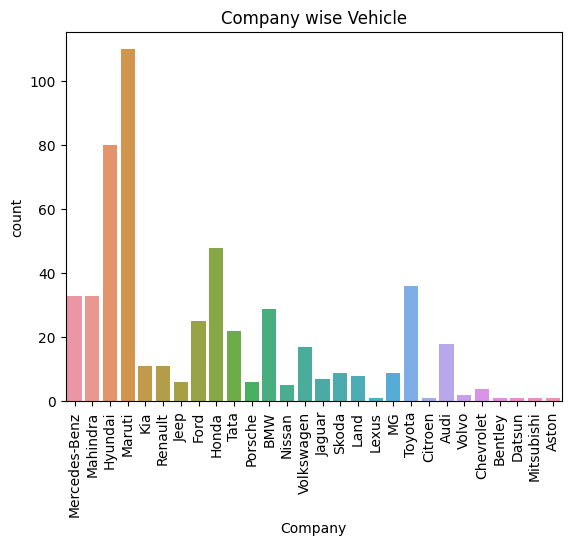

In [35]:
sns.countplot(x='Company', data=df)
plt.xticks(rotation=90)
plt.title("Company wise Vehicle")
plt.show()

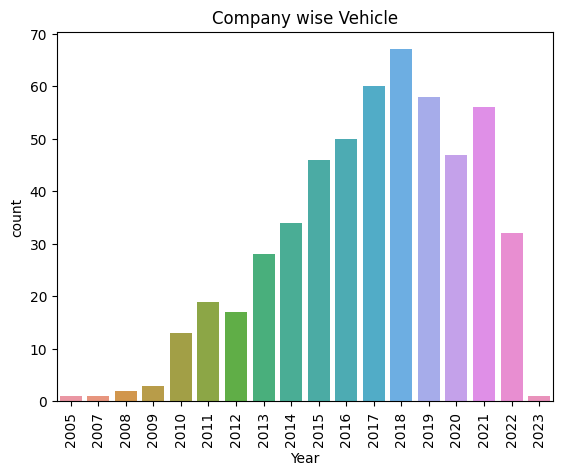

In [36]:
sns.countplot(x='Year', data=df)
plt.xticks(rotation=90)
plt.title("Company wise Vehicle")
plt.show()

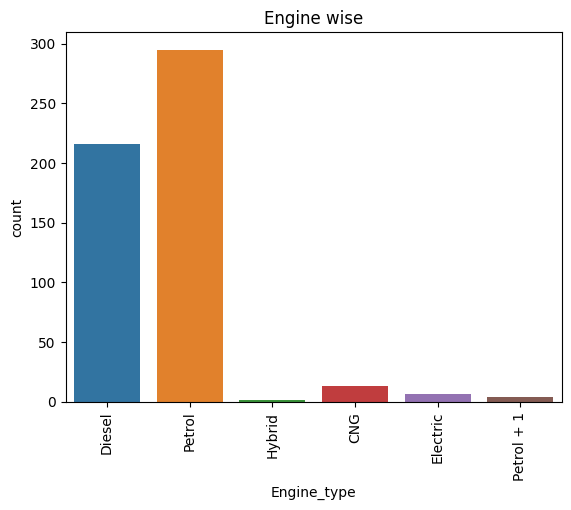

In [37]:
sns.countplot(x='Engine_type', data=df)
plt.xticks(rotation=90)
plt.title("Engine wise")
plt.show()

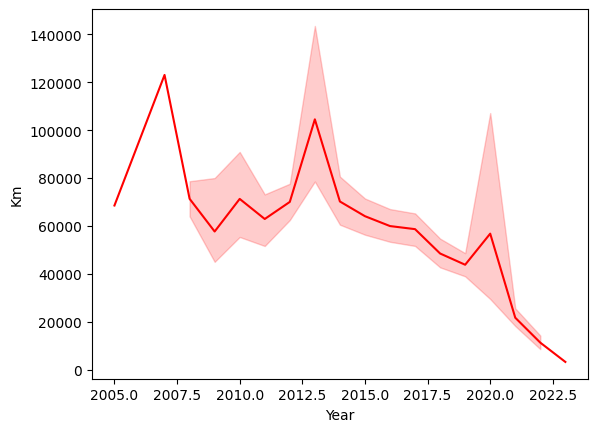

In [38]:
sns.lineplot(x = "Year", y = "Km", data = df, color='red')
plt.show()

In [39]:
df['Company'].unique()

array(['Mercedes-Benz', 'Mahindra', 'Hyundai', 'Maruti', 'Kia', 'Renault',
       'Jeep', 'Ford', 'Honda', 'Tata', 'Porsche', 'BMW', 'Nissan',
       'Volkswagen', 'Jaguar', 'Skoda', 'Land', 'Lexus', 'MG', 'Toyota',
       'Citroen', 'Audi', 'Volvo', 'Chevrolet', 'Bentley', 'Datsun',
       'Mitsubishi', 'Aston'], dtype=object)

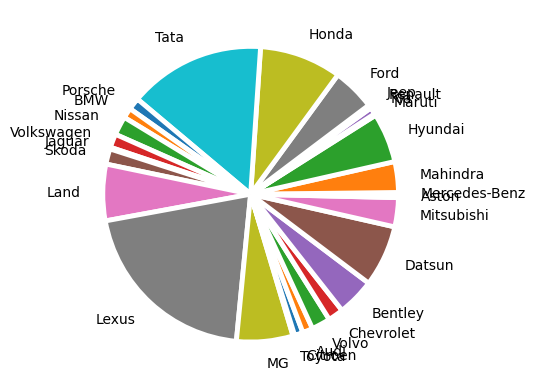

In [47]:
# Company wise pie plot
plt.pie(dup_company, labels=df['Company'].unique(), labeldistance=1.15, wedgeprops = { 'linewidth' : 3.5, 'edgecolor' : 'white' });

Engine Type Max count

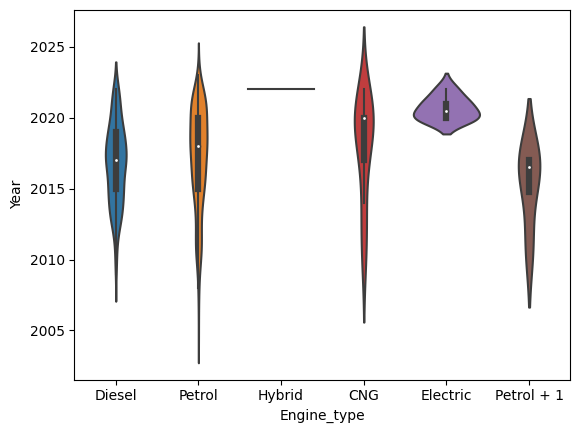

In [41]:
# Engine type and year wise
sns.violinplot(x=df["Engine_type"], y=df["Year"])
plt.show()

Which year is having max count of manufacturing

- Vehicles having max number of year manufacturing count

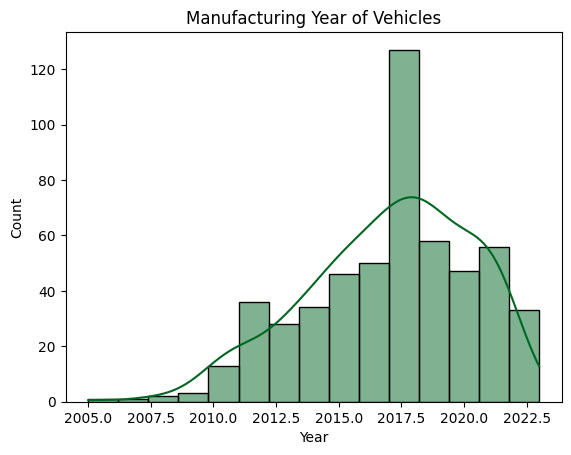

In [42]:
# Year wise
sns.histplot(data=df, x="Year",color='#006622', kde=True)
plt.title("Manufacturing Year of Vehicles")
plt.ylabel("Count")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

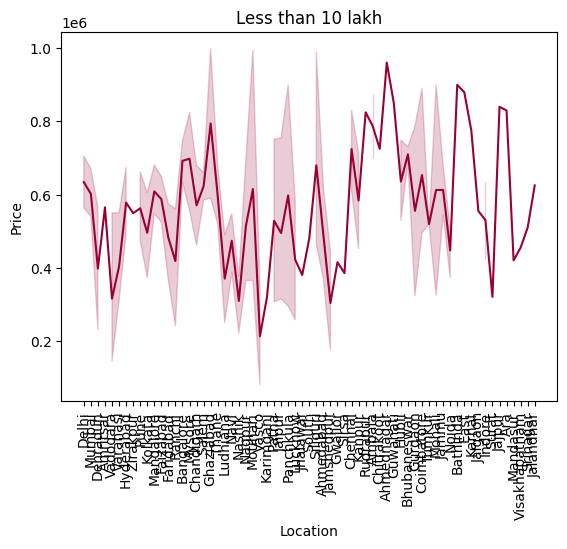

In [43]:
df_less_ten = df[df['Price']<1000000].value_counts().reset_index()
sns.lineplot(x = "Location", y = "Price", data = df_less_ten, color='#990033')
plt.title("Less than 10 lakh")
plt.xticks(rotation=90)
plt.show

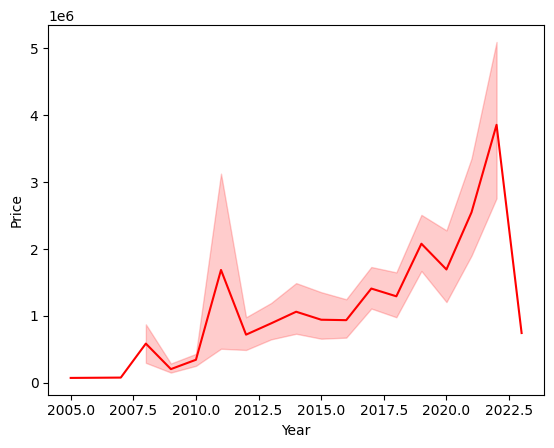

In [51]:
##Relationship Between year and price
sns.lineplot(x="Year",y="Price",data=df,color="Red")
plt.show()